In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from metpy.plots import USCOUNTIES
from datetime import datetime, timedelta
from netCDF4 import num2date
from siphon.catalog import TDSCatalog
import scipy.ndimage as ndimage

In [12]:
def get_gfs_data(url):
    best_gfs = TDSCatalog(url)
    best_ds = best_gfs.datasets[0]
    ncss = best_ds.subset()
    
    query = ncss.query()
    query.lonlat_box(north=55, south=20, east=300, west=220)
    query.accept('netcdf')
    query.variables('Geopotential_height_isobaric')
    query.vertical_level(50000)

    data = ncss.get_data(query)
    
    height_var = data['Geopotential_height_isobaric']
    time_var = data['time']
    lat_var = data['lat']
    lon_var = data['lon']

    height_vals = height_var[:].squeeze()
    lat_vals = lat_var[:].squeeze()
    lon_vals = lon_var[:].squeeze()
    time_vals = num2date(time_var[:].squeeze(), time_var.units)

    lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)
    
    return lon_2d, lat_2d, height_vals, time_vals

def plot_on_map(lon_2d, lat_2d, data_diff, title):
   mapcrs = ccrs.LambertConformal(central_longitude=-98, central_latitude=39)  
   datacrs = ccrs.PlateCarree() 
   fig = plt.figure(figsize=(18,12)) 
   ax = fig.add_subplot(1, 1, 1, projection=mapcrs) 
   ax.set_extent([-120, -75, 25, 50], datacrs) 
   ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=2)
   ax.add_feature(USCOUNTIES.with_scale('5m'), linewidth=0.25, alpha = 0.5)
   contour = plt.contour(lon_2d, lat_2d, ndimage.gaussian_filter(data_diff, sigma=2, order=0), levels=range(-150, 151, 10), transform=ccrs.PlateCarree(), colors='black', linewidths=0.5)
   ax.clabel(contour, fontsize=12, inline=1, inline_spacing=4, fmt='%i')
   contourf = plt.contourf(lon_2d, lat_2d, ndimage.gaussian_filter(data_diff, sigma=2, order=0), levels=range(-150, 151, 10), transform=ccrs.PlateCarree(), cmap='coolwarm', linewidths=2)
   cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0, aspect=50, shrink=0.85)
   cbar.set_label('Geopotential Height Difference (m)')
   plt.title('GFS 500MB: Geopotential Height Difference (m)', loc='left')
   plt.title(f'Valid: {title}', loc='right')
   plt.show()
   #plt.savefig(filename)
   #plt.close()
   

In [13]:
urls = [
    'https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201104/20110427/catalog.html?dataset=gfs-g4-anl-files-old/201104/20110427/gfsanl_4_20110427_1200_000.grb2',
    'https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201104/20110427/catalog.html?dataset=gfs-g4-anl-files-old/201104/20110427/gfsanl_4_20110427_1800_000.grb2',
    'https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201104/20110428/catalog.html?dataset=gfs-g4-anl-files-old/201104/20110428/gfsanl_4_20110428_0000_000.grb2']


In [14]:
lon_2d_list = []
lat_2d_list = []
height_vals_list = []
time_vals_list = []

for url in urls:
    lon_2d, lat_2d, height_vals, time_vals = get_gfs_data(url)
    lon_2d_list.append(lon_2d)
    lat_2d_list.append(lat_2d)
    height_vals_list.append(height_vals)
    time_vals_list.append(time_vals)

C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201104/20110427/catalog.html?dataset=gfs-g4-anl-files-old/201104/20110427/gfsanl_4_20110427_1200_000.grb2 returned HTML. Changing to: https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201104/20110427/catalog.xml?dataset=gfs-g4-anl-files-old/201104/20110427/gfsanl_4_20110427_1200_000.grb2
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,
C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201104/20110427/catalog.html?dataset=gfs-g4-anl-files-old/201104/20110427/gfsanl_4_20110427_1800_000.grb2 returned HTML. Changing to: https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201104/20110427/catalog.xml?dataset=gfs-g4-anl-files-old/201104/20110427/gfsanl_4_20110427_1800_000.grb2
 

In [15]:
differences_list = []

specific_url_names = [
    ("4/27 12z", "4/27 18z"),
    ("4/27 18z", "4/28 00z")]

for i in range(len(urls)-1):
    lon_2d_1, lat_2d_1, height_vals_1, time_vals_1 = lon_2d_list[i], lat_2d_list[i], height_vals_list[i], time_vals_list[i]
    lon_2d_2, lat_2d_2, height_vals_2, time_vals_2 = lon_2d_list[i+1], lat_2d_list[i+1], height_vals_list[i+1], time_vals_list[i+1]
    height_diff = height_vals_2 - height_vals_1
    differences_list.append(height_diff)

C:\Users\Tony\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1662: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


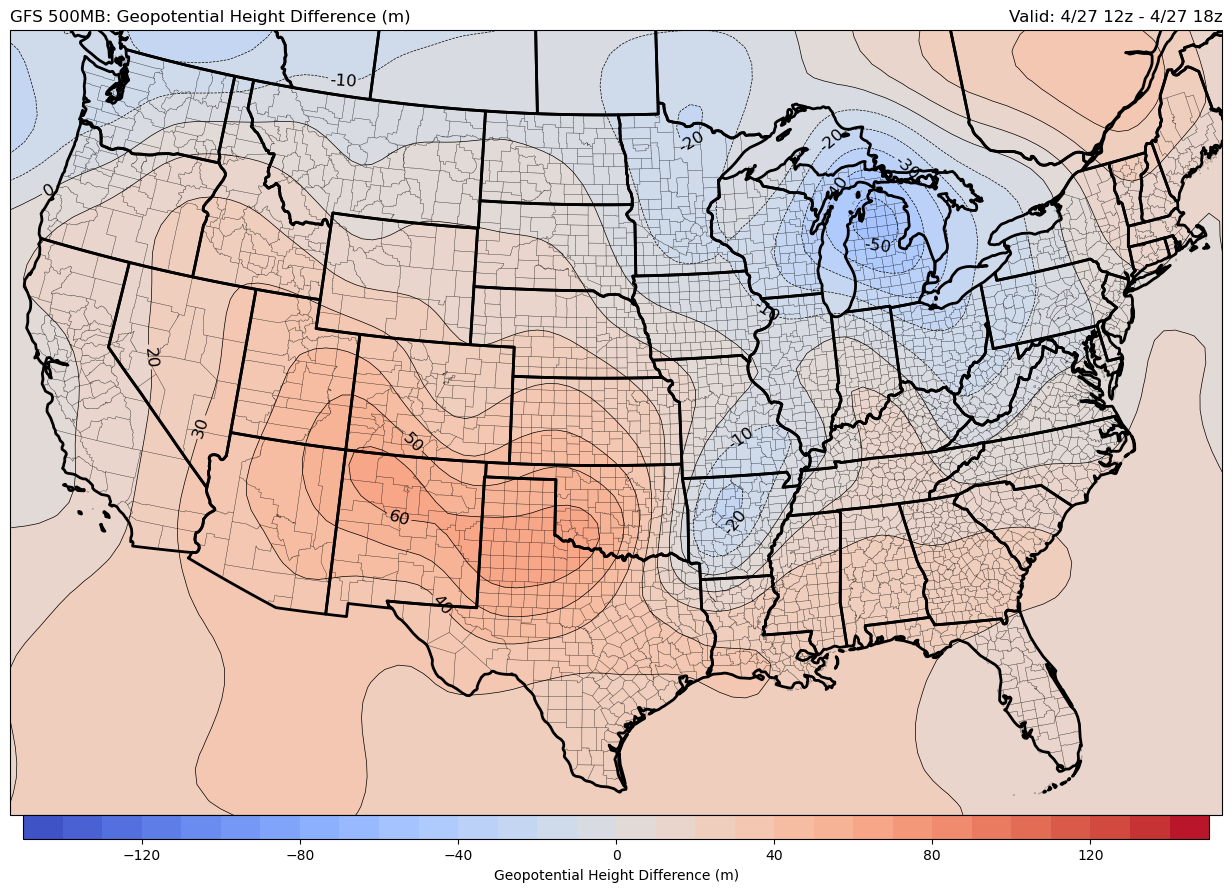

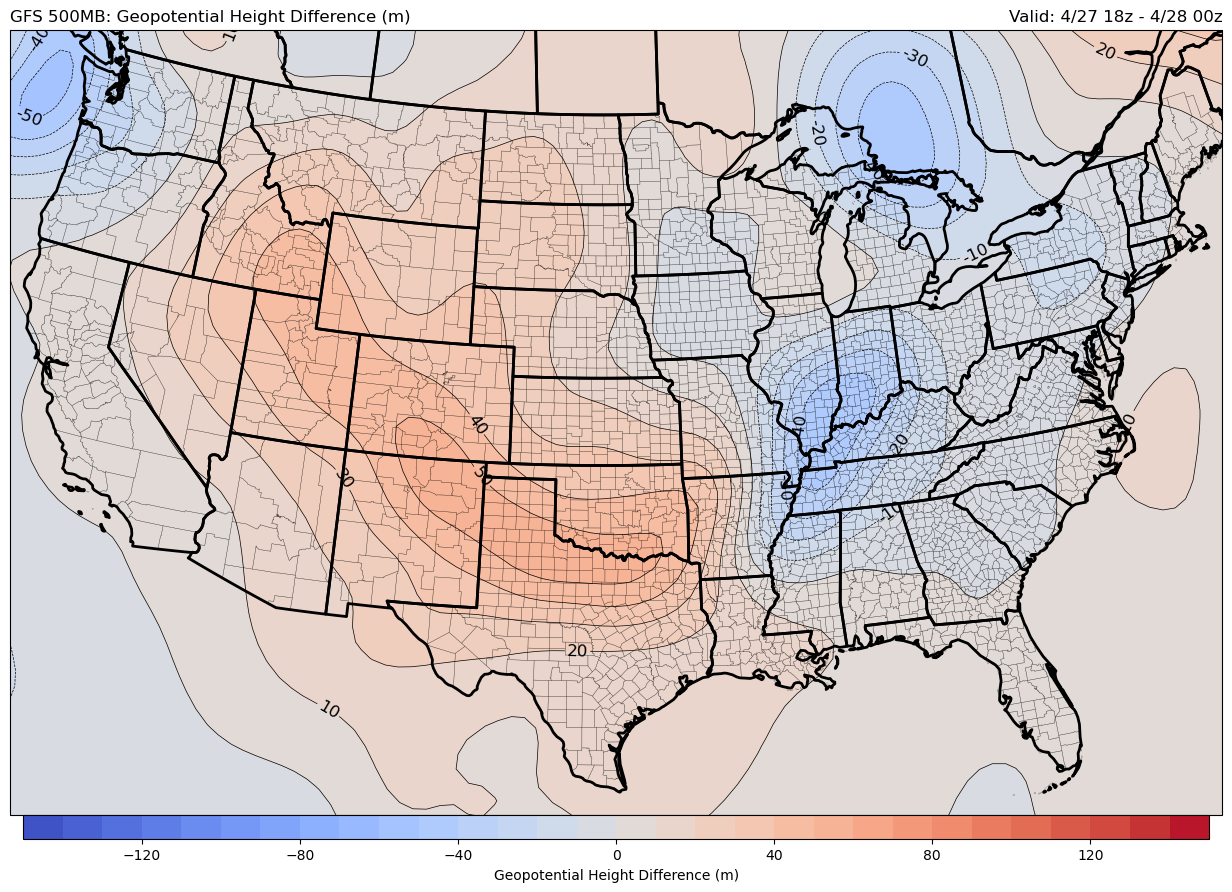

In [16]:
for i, (height_diff, (end_time, start_time)) in enumerate(zip(differences_list, specific_url_names)):
    lon_2d, lat_2d = lon_2d_list[i], lat_2d_list[i]
    title = f"{end_time} - {start_time}"
    plot_on_map(lon_2d, lat_2d, height_diff, title)